불러온 모델의 중간층의 출력을 살펴봅시다.

In [1]:
#from keras.applications.resnet50 import ResNet50 as pre_model
#from keras.applications.resnet50 import preprocess_input, decode_predictions

#from keras.applications.xception import Xception as pre_model
#from keras.applications.xception import preprocess_input, decode_predictions

from keras.applications.vgg16 import VGG16 as pre_model
from keras.applications.vgg16 import preprocess_input, decode_predictions

#from keras.applications.vgg19 import VGG19 as pre_model
#from keras.applications.vgg19 import preprocess_input, decode_predictions

#from keras.applications.inception_v3 import InceptionV3 as pre_model
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

model = pre_model( weights='imagenet', include_top=False )
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

모델의 입력부터 특정 층까지의 새로운 모델을 만듭니다.

In [2]:
from keras.models import Model
model_inter = Model(model.input, model.get_layer('block1_pool').output)
model_inter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


중간층까지 정의된 모델의 출력을 확인해봅시다.

<class 'PIL.Image.Image'>


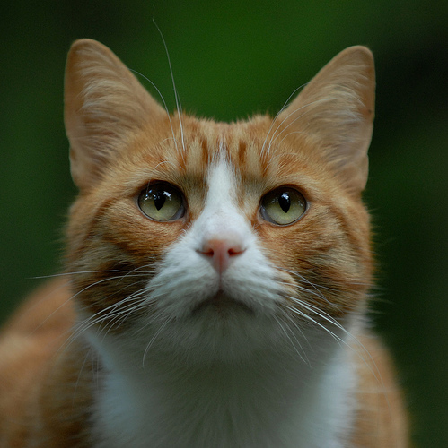

image (448, 448, 3) float32
images (1, 448, 448, 3) float32
x (1, 448, 448, 3) float32
feature_maps (1, 224, 224, 64) float32


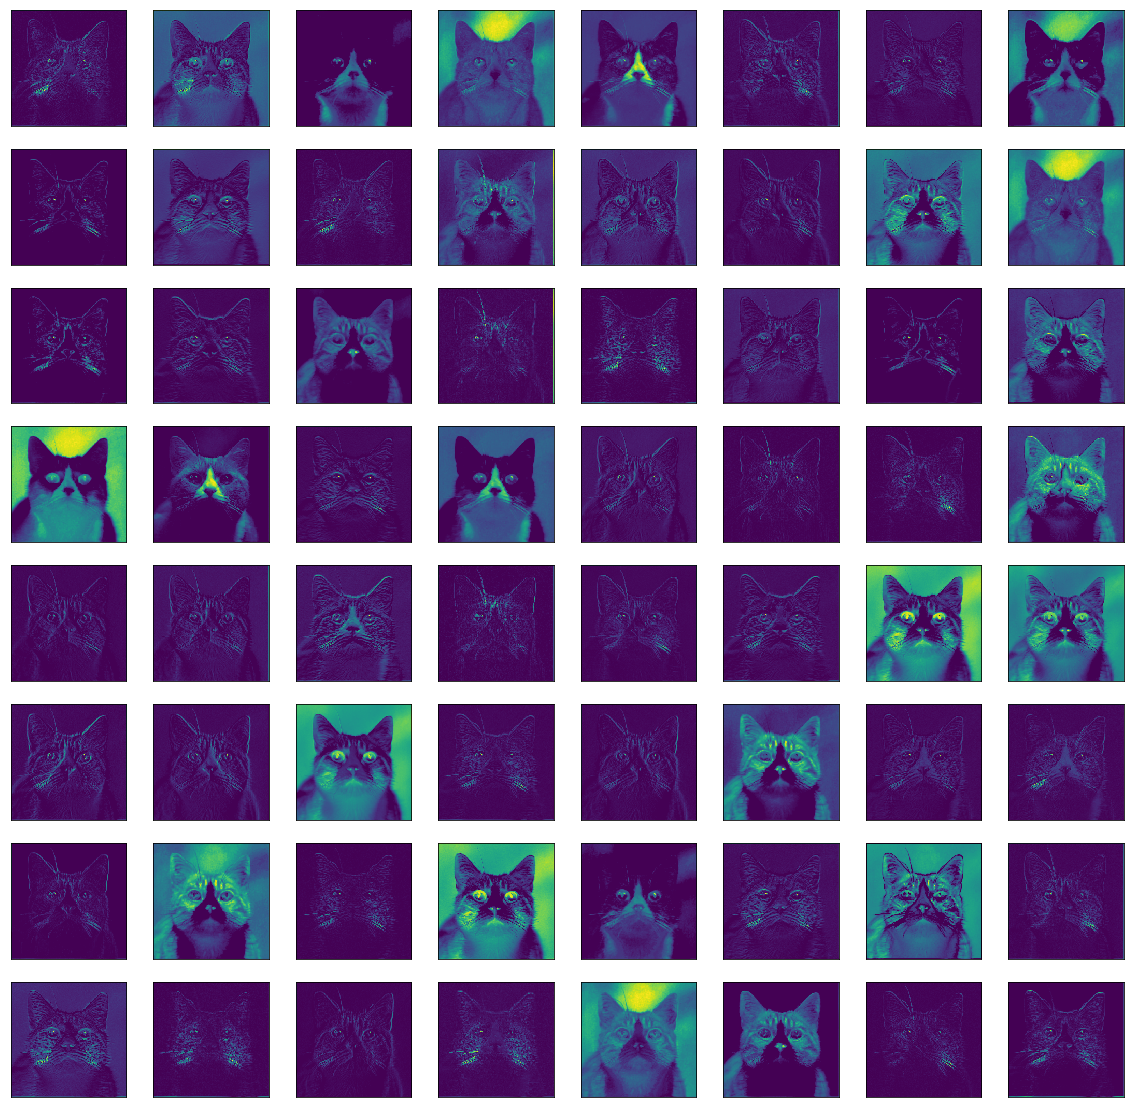

In [3]:
# pip install pillow
%matplotlib inline
import keras
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pil_img = keras.preprocessing.image.load_img( 'cat.jpg', target_size=(448, 448) )
print( type(pil_img) )
display(pil_img)

image = keras.preprocessing.image.img_to_array(pil_img)
print( 'image', image.shape, image.dtype )

images = np.expand_dims(image, axis=0)
print( 'images', images.shape, images.dtype )

x = preprocess_input(images)
print( 'x', x.shape, x.dtype )

feature_maps = model_inter.predict(x)
print( 'feature_maps', feature_maps.shape, feature_maps.dtype )

plt.figure( figsize=(20,20) )
for i in range(8*8):
    plt.subplot( 8, 8, i+1 )
    plt.xticks([]); plt.yticks([])
    plt.imshow( feature_maps[0,:,:,i] )
plt.show()